<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/SSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install pyts


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
import pandas as pd

In [2]:

# Чтение временного ряда из CSV-файла
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/zvezda/Server_zvezda/Dataset/ts_new.csv')
time_series = df.copy()
time_series_train = time_series[:52].copy()
time_series_train

,Sales,Times
0,188282.370,2022-01-02
1,175635.080,2022-01-16
2,180745.570,2022-01-30
3,175553.950,2022-02-13
4,153592.780,2022-02-27
5,138011.880,2022-03-13
6,138984.360,2022-03-27
7,149172.840,2022-04-10
8,142690.270,2022-04-24
9,141244.220,2022-05-08


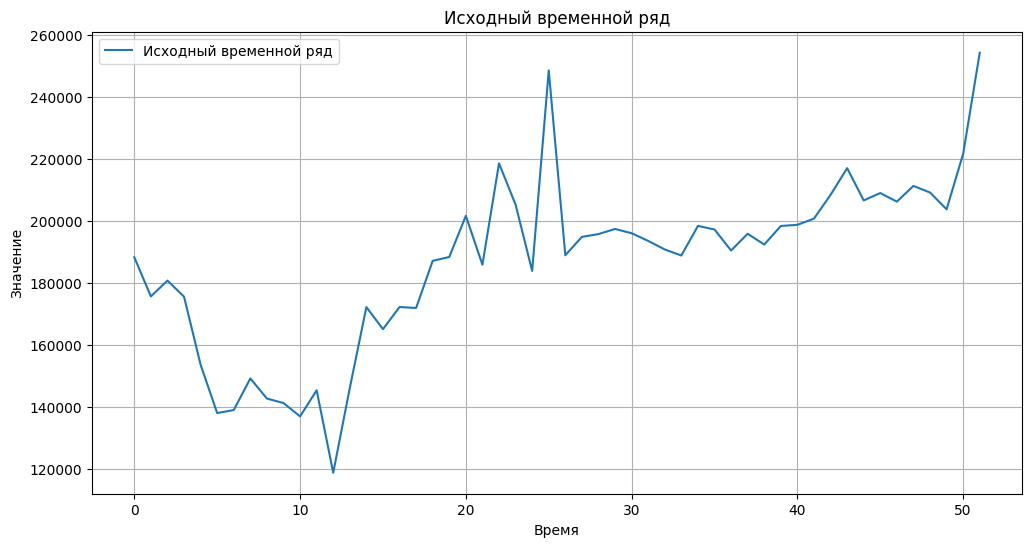

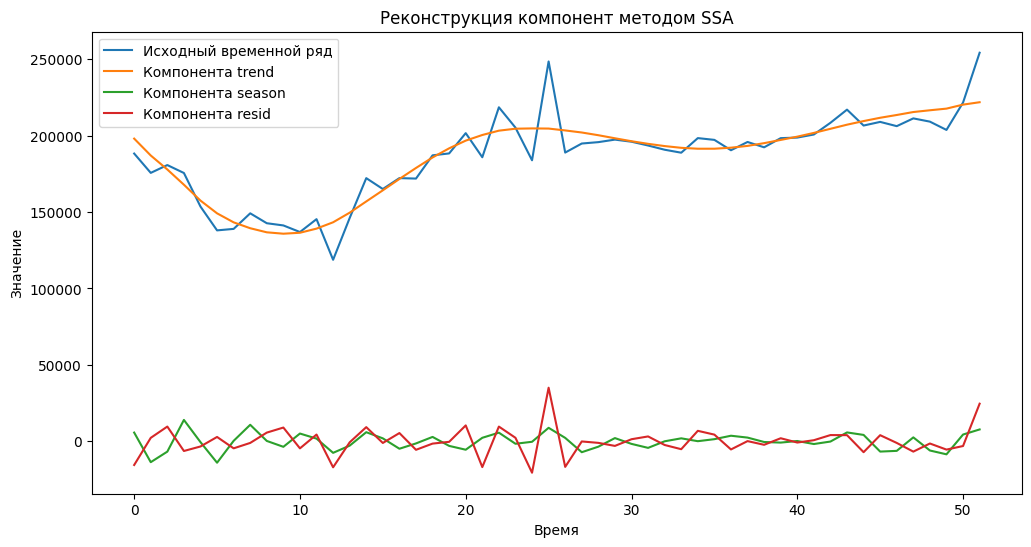

[0]
[1, 2]


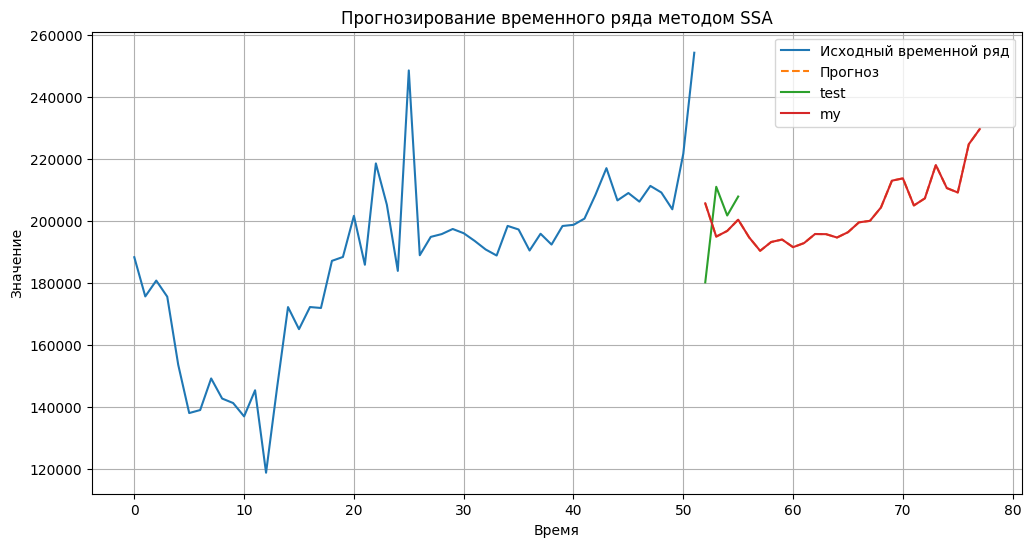

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis


# Визуализация исходного временного ряда
plt.figure(figsize=(12, 6))
plt.plot(time_series_train['Times'].index, time_series_train['Sales'], label='Исходный временной ряд')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Исходный временной ряд')
plt.legend()
plt.grid(True)
plt.show()

# Параметры SSA
window_size = 26  # Размер окна для эмбеддинга
# groups = [np.arange(i, i + 5) for i in range(0, 11, 5)]  # Группы компонент для реконструкции (можно изменять)
groups = [[0],[1,2]]

# Применение SSA
ssa = SingularSpectrumAnalysis(window_size=window_size, groups='auto')
X_ssa = ssa.fit_transform(time_series_train['Sales'].to_numpy().reshape(1, -1))

# Визуализация реконструированных компонент
plt.figure(figsize=(12, 6))
plt.plot(time_series_train['Times'].index, time_series_train['Sales'], label='Исходный временной ряд')
lt = ['trend','season','resid']
for i in range(X_ssa.shape[1]):
    plt.plot(time_series_train['Times'].index, X_ssa[0, i, :], label=f'Компонента {lt[i]}')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Реконструкция компонент методом SSA')
plt.legend()
plt.show()

# Прогнозирование на основе SSA (продолжение тренда и сезонности)
# Здесь просто экстраполируем последние значения компонент
n_forecast = 26
forecast = np.zeros(n_forecast)

my = X_ssa[0,1,:] +X_ssa[0,0,:]


for group in groups:
    print(group)
    last_values = X_ssa[0, groups.index(group), -window_size:]
    forecast += np.tile(last_values, n_forecast // window_size + 1)[:n_forecast]

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(time_series_train['Times'].index, time_series_train['Sales'], label='Исходный временной ряд')
plt.plot(np.arange(len(time_series_train['Times']), len(time_series_train['Times']) + n_forecast), forecast, label='Прогноз', linestyle='--')
plt.plot(df[-4:]['Times'].index,df[-4:]['Sales'], label='test')
plt.plot(np.arange(len(time_series_train['Times']), len(time_series_train['Times']) + n_forecast),my[n_forecast:],label='my')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Прогнозирование временного ряда методом SSA')
plt.legend()
plt.grid(True)
plt.show()


In [73]:
X_ssa.shape

(1, 3, 52)

In [95]:
last_values

array([ 2248.28818877, -7125.57887973, -3512.11392496,  2116.34836374,
       -1685.31079721, -4289.66018306,    16.91770506,  1954.376983  ,
          80.6505801 ,  1403.88416741,  3654.05800065,  2434.49532541,
        -447.55946115,  -836.28543847,   201.33333097, -1776.89664598,
        -153.59963673,  5811.58276471,  4187.77101781, -6715.44396651,
       -6244.95144752,  2577.05714322, -6007.06045955, -8513.30321379,
        4429.63315882,  7767.15110032])

In [106]:
X_ssa[0, 1, -window_size:]

array([ 2248.28818877, -7125.57887973, -3512.11392496,  2116.34836374,
       -1685.31079721, -4289.66018306,    16.91770506,  1954.376983  ,
          80.6505801 ,  1403.88416741,  3654.05800065,  2434.49532541,
        -447.55946115,  -836.28543847,   201.33333097, -1776.89664598,
        -153.59963673,  5811.58276471,  4187.77101781, -6715.44396651,
       -6244.95144752,  2577.05714322, -6007.06045955, -8513.30321379,
        4429.63315882,  7767.15110032])

In [109]:
X_ssa[0,1,:]

array([  5717.67361676, -13646.32728756,  -6748.03087621,  13995.96791758,
         -532.76404011, -14004.59192135,    315.38387304,  10811.18393191,
          247.25716526,  -3595.80044919,   5086.48720223,   1770.24374573,
        -7537.44436152,  -2826.02581583,   5970.63630913,   1927.25006891,
        -4856.21635117,  -1383.82042095,   2879.80977522,  -2998.74450971,
        -5500.43108896,   2303.94276452,   5660.27312112,  -1599.79955441,
         -302.10188846,   8833.21881173,   2248.28818877,  -7125.57887973,
        -3512.11392496,   2116.34836374,  -1685.31079721,  -4289.66018306,
           16.91770506,   1954.376983  ,     80.6505801 ,   1403.88416741,
         3654.05800065,   2434.49532541,   -447.55946115,   -836.28543847,
          201.33333097,  -1776.89664598,   -153.59963673,   5811.58276471,
         4187.77101781,  -6715.44396651,  -6244.95144752,   2577.05714322,
        -6007.06045955,  -8513.30321379,   4429.63315882,   7767.15110032])

In [130]:
my = X_ssa[0,1,:] +X_ssa[0,0,:]
my[:n_forecast]

array([203772.88696742, 173362.62827109, 171100.52761527, 181885.56602407,
       156966.71948563, 135162.64815959, 143579.88245955, 150225.05636299,
       136992.16794772, 132240.55542497, 141541.66459554, 140936.29531725,
       135771.16260876, 146769.68871894, 162917.45008623, 166155.4971042 ,
       166805.41587893, 177461.32457514, 188606.15270031, 188697.04838679,
       191233.25179769, 202725.11281639, 208907.49918343, 202932.79502095,
       204419.52799185, 213460.65217822])

In [123]:
52//26

2

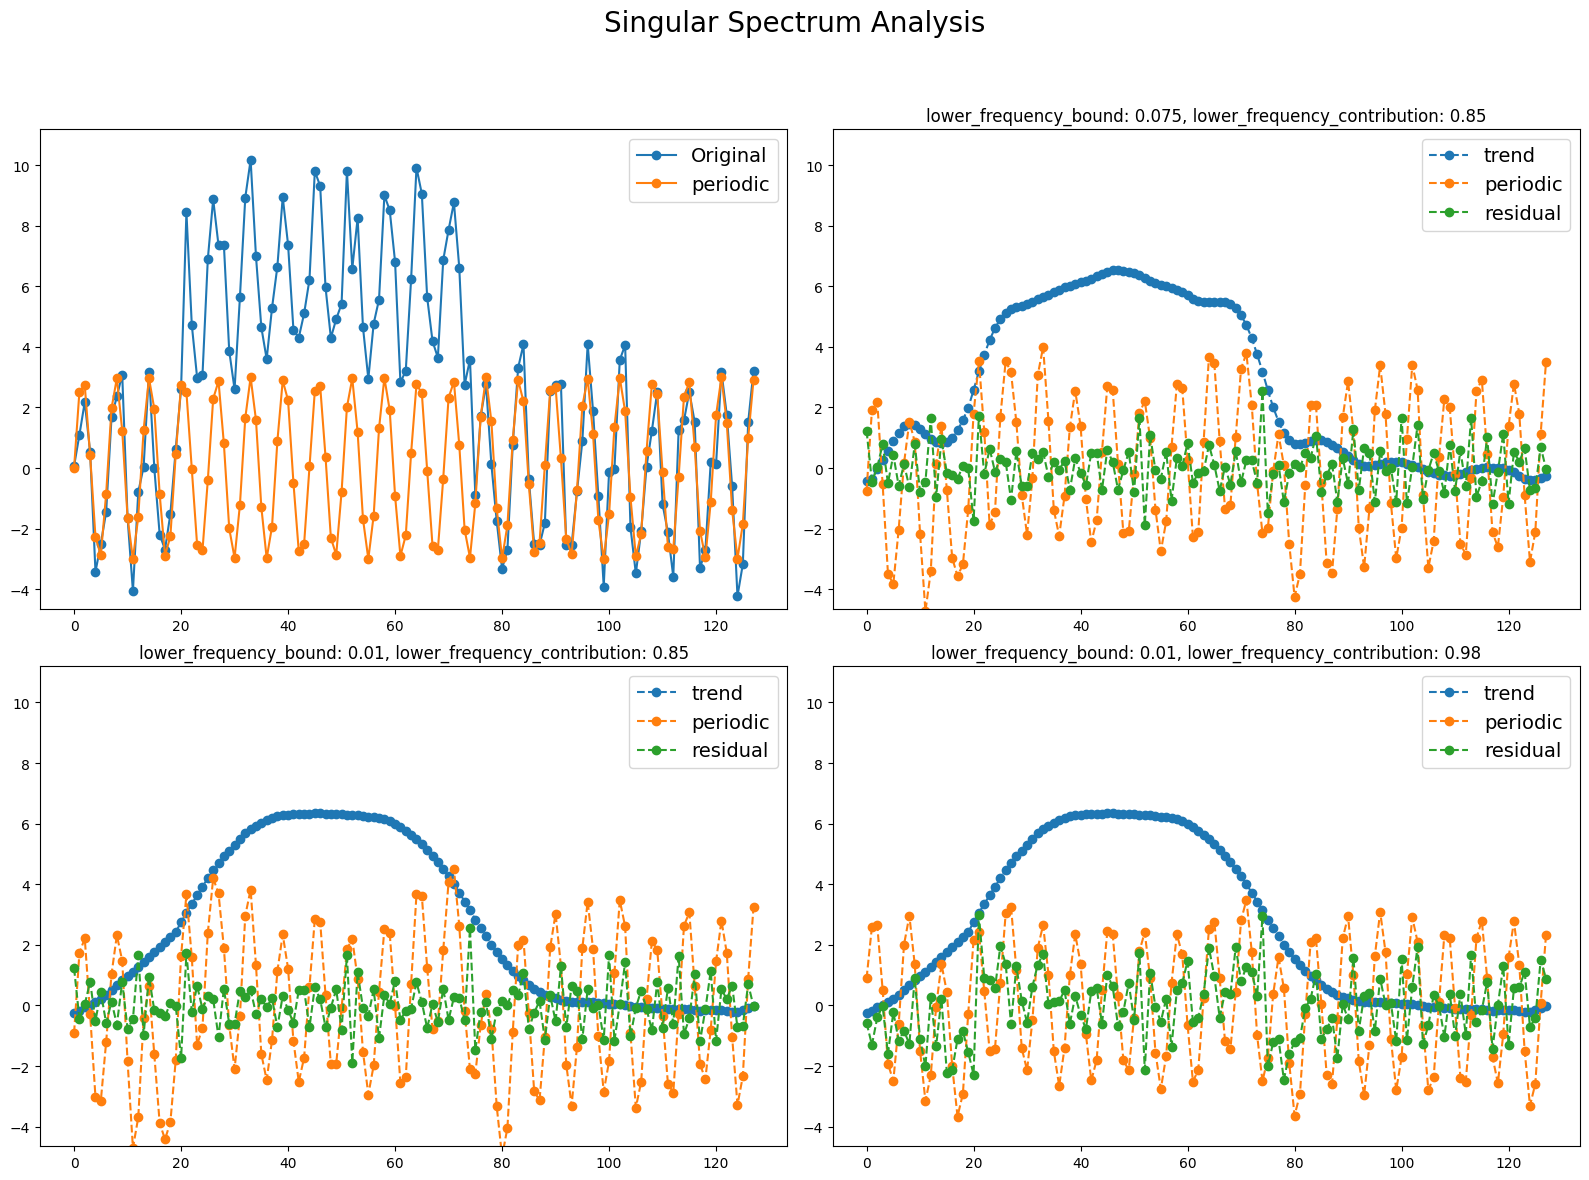

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
from pyts.datasets import make_cylinder_bell_funnel

# Parameters
n_samples, n_timestamps = 3, 128

X_cbf, y = make_cylinder_bell_funnel(n_samples=10, random_state=42,
                                     shuffle=False)
X_period = 3 * np.sin(np.arange(n_timestamps))

X = X_cbf[:, :n_timestamps] + X_period

# We decompose the time series into three subseries
window_size = 20
# Singular Spectrum Analysis
ssa = SingularSpectrumAnalysis(window_size=window_size, groups="auto")
X_ssa = ssa.fit_transform(X)

# Show the results for different frequency-parameters
plt.figure(figsize=(16, 12))

ax1 = plt.subplot(221)
ax1.plot(X[0], 'o-', label='Original')
ax1.plot(X_period, 'o-', label='periodic')
ax1.legend(loc='best', fontsize=14)
ax1.set_ylim([np.min(X[0])*1.1, np.max(X[0])*1.1])

params = [(0.01, 0.85), (0.01, 0.98)]

for idx in range(3):
    ax = plt.subplot(222 + idx)
    labels = ["trend", "periodic", "residual"]
    for i in range(3):
        ax.plot(X_ssa[0, i], 'o--', label=labels[i])
    ax.legend(loc='best', fontsize=14)
    ax.set_ylim([np.min(X[0])*1.1, np.max(X[0])*1.1])
    ax.set_title(f"lower_frequency_bound: {ssa.lower_frequency_bound}, "
                 f"lower_frequency_contribution: "
                 f"{ssa.lower_frequency_contribution}")

    if idx > 1:
        continue
    ssa = SingularSpectrumAnalysis(window_size=window_size, groups="auto",
                                   lower_frequency_bound=params[idx][0],
                                   lower_frequency_contribution=params[idx][1])
    X_ssa = ssa.fit_transform(X)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

(10, 128)

In [53]:
X.shape

(10, 128)

In [56]:
X_ssa.shape

(10, 3, 128)

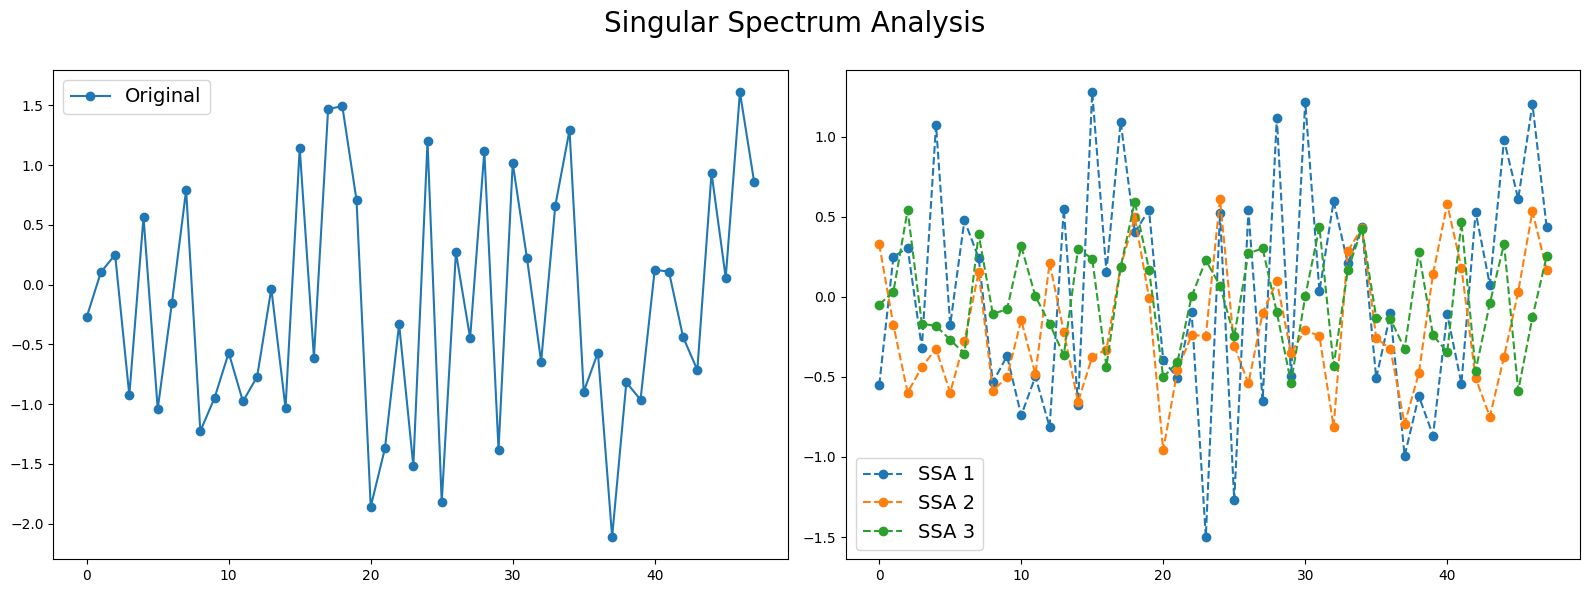

In [15]:
"""
==========================
Singular Spectrum Analysis
==========================
Signals such as time series can be seen as a sum of different signals such
as trends and noise. Decomposing time series into several time series can
be useful in order to keep the most important information. One decomposition
algorithm is Singular Spectrum Analysis. This example illustrates the
decomposition of a time series into several subseries using this algorithm and
visualizes the different subseries extracted.
It is implemented as :class:`pyts.decomposition.SingularSpectrumAnalysis`.
"""

# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis

# Parameters
n_samples, n_timestamps = 100, 48

# Toy dataset
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)

# We decompose the time series into three subseries
window_size = 15
groups = [np.arange(i, i + 5) for i in range(0, 11, 5)]

# Singular Spectrum Analysis
ssa = SingularSpectrumAnalysis(window_size=15, groups=groups)
X_ssa = ssa.fit_transform(X)

# Show the results for the first time series and its subseries
plt.figure(figsize=(16, 6))

ax1 = plt.subplot(121)
ax1.plot(X[0], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(len(groups)):
    ax2.plot(X_ssa[0, i], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# The first subseries consists of the trend of the original time series.
# The second and third subseries consist of noise.

In [16]:
groups

[array([0, 1, 2, 3, 4]), array([5, 6, 7, 8, 9]), array([10, 11, 12, 13, 14])]

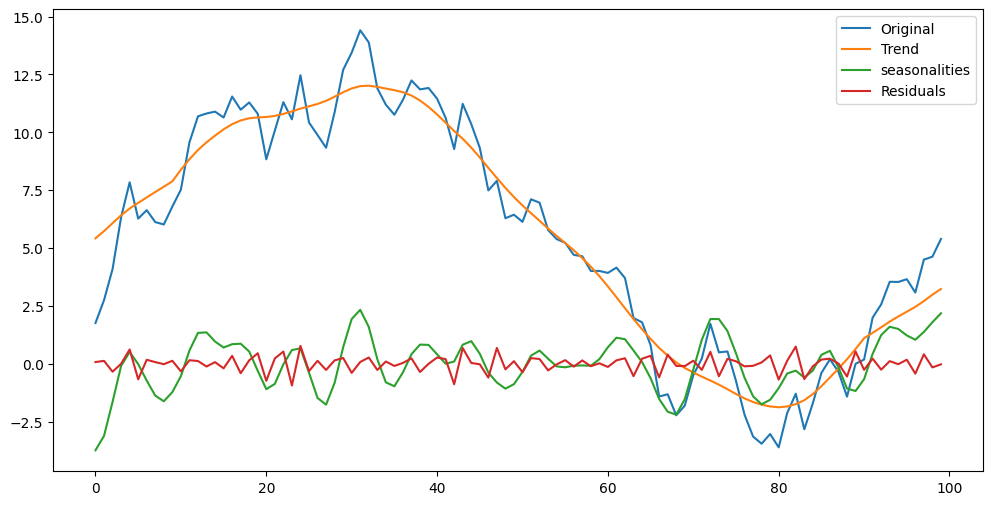

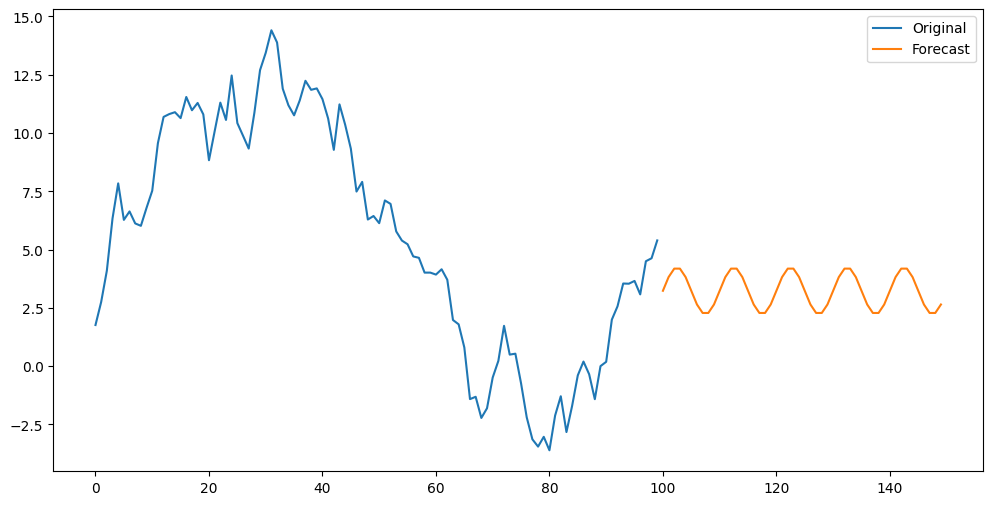

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
from statsmodels.tsa.seasonal import seasonal_decompose

# Создаем примерный временной ряд
np.random.seed(0)
n_samples = 100
n_observed = 10
time_series = np.cumsum(np.random.normal(size=n_samples)) + np.sin(np.arange(n_samples) * 2 * np.pi / 10)

# Создаем pandas Series для временного ряда
series = pd.Series(time_series)

# Декомпозиция временного ряда с помощью SSA
ssa = SingularSpectrumAnalysis(window_size=10, groups='auto')
X_ssa = ssa.fit_transform(series.values.reshape(1, -1))

# Получаем компоненты SSA
trends = X_ssa[:, 0]
seasonalities = X_ssa[:, 1]
residuals = X_ssa[:, 2]

# Визуализируем компоненты
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original')
plt.plot(np.arange(len(trends[0])), trends[0], label='Trend')
plt.plot(np.arange(len(seasonalities[0])), seasonalities[0], label='seasonalities')
plt.plot(np.arange(len(residuals[0])), residuals[0], label='Residuals')
plt.legend()
plt.show()

# Построение прогноза
# Построение прогноза
forecast_length = 50
forecast = np.zeros(forecast_length)
for i in range(forecast_length):
    forecast[i] = trends[0][-1] + np.sin((i + n_samples) * 2 * np.pi / 10)

# Визуализируем прогноз
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original')
plt.plot(np.arange(n_samples, n_samples + forecast_length), forecast, label='Forecast')
plt.legend()
plt.show()

In [27]:
X_ssa.shape

(1, 3, 100)

In [28]:
series.values.reshape(1, -1).shape

(1, 100)

In [30]:
trends[0]

array([ 5.42016272,  5.73392005,  6.0759521 ,  6.41586563,  6.70935405,
        6.95372103,  7.18765141,  7.42048648,  7.65075502,  7.88162744,
        8.382066  ,  8.8386684 ,  9.23316623,  9.56849598,  9.85648749,
       10.12799164, 10.35306613, 10.51237584, 10.60659425, 10.64393524,
       10.65995689, 10.7078734 , 10.79377312, 10.9003681 , 11.02399213,
       11.1216166 , 11.22544706, 11.36031128, 11.53887702, 11.73039488,
       11.89479222, 11.99415227, 12.0137807 , 11.96241218, 11.88976687,
       11.81959638, 11.73070943, 11.58791369, 11.3739544 , 11.09577607,
       10.77131245, 10.41355768, 10.0570421 ,  9.72103897,  9.33788838,
        8.9141179 ,  8.46440289,  8.02589946,  7.5986039 ,  7.20387326,
        6.83937019,  6.50561939,  6.17806808,  5.84251122,  5.52356084,
        5.21797041,  4.90890358,  4.56685423,  4.19735504,  3.78804142,
        3.34427811,  2.87772868,  2.40084467,  1.93605879,  1.49428704,
        1.07661667,  0.68901859,  0.3553565 ,  0.06397048, -0.17

In [37]:
trends[0]

array([ 5.42016272,  5.73392005,  6.0759521 ,  6.41586563,  6.70935405,
        6.95372103,  7.18765141,  7.42048648,  7.65075502,  7.88162744,
        8.382066  ,  8.8386684 ,  9.23316623,  9.56849598,  9.85648749,
       10.12799164, 10.35306613, 10.51237584, 10.60659425, 10.64393524,
       10.65995689, 10.7078734 , 10.79377312, 10.9003681 , 11.02399213,
       11.1216166 , 11.22544706, 11.36031128, 11.53887702, 11.73039488,
       11.89479222, 11.99415227, 12.0137807 , 11.96241218, 11.88976687,
       11.81959638, 11.73070943, 11.58791369, 11.3739544 , 11.09577607,
       10.77131245, 10.41355768, 10.0570421 ,  9.72103897,  9.33788838,
        8.9141179 ,  8.46440289,  8.02589946,  7.5986039 ,  7.20387326,
        6.83937019,  6.50561939,  6.17806808,  5.84251122,  5.52356084,
        5.21797041,  4.90890358,  4.56685423,  4.19735504,  3.78804142,
        3.34427811,  2.87772868,  2.40084467,  1.93605879,  1.49428704,
        1.07661667,  0.68901859,  0.3553565 ,  0.06397048, -0.17